In [2]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 99)
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
filepath = 'hotel_bookings_data.csv'

# <B>Task 1: Data Preprocessing</b>

In [4]:
df = pd.read_csv(filepath)

In [5]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,meal,city,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
0,Resort Hotel,0,342,2017,September,27,1,0,0,2,0.0,0,Breakfast,Kota Denpasar,Direct,Direct,0,0,0,3,No Deposit,NaN,NaN,0,Personal,0.0,0,0,Check-Out
1,Resort Hotel,0,737,2017,September,27,1,0,0,2,0.0,0,Breakfast,Kota Denpasar,Direct,Direct,0,0,0,4,No Deposit,NaN,NaN,0,Personal,0.0,0,0,Check-Out
2,Resort Hotel,0,7,2017,September,27,1,0,1,1,0.0,0,Breakfast,Kabupaten Bangka,Direct,Direct,0,0,0,0,No Deposit,NaN,NaN,0,Personal,75.0,0,0,Check-Out
3,Resort Hotel,0,13,2017,September,27,1,0,1,1,0.0,0,Breakfast,Kabupaten Bangka,Corporate,Corporate,0,0,0,0,No Deposit,304.0,NaN,0,Personal,75.0,0,0,Check-Out
4,Resort Hotel,0,14,2017,September,27,1,0,2,2,0.0,0,Breakfast,Kabupaten Bangka,Online TA,TA/TO,0,0,0,0,No Deposit,240.0,NaN,0,Personal,98.0,0,1,Check-Out


## <I>Handling Missing Value</I>

In [6]:
# Check for missing values
missing_values = df.isna()
# Count the number of missing values per column
missing_values_count = missing_values.sum()
print(missing_values_count)

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_weekdays_nights               0
adults                                 0
children                               4
babies                                 0
meal                                   0
city                                 488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
booking_changes                        0
deposit_type                           0
agent                              16340
company                           112593
days_in_waiting_list                   0
customer_type   

delete the company column because there is a lot of null data

In [7]:
dfc = df.drop('company', axis=1)

In [8]:
#separate dtype numeric and string
nums = []
cats = []

for i in dfc.columns :
    if dfc[i].dtypes == 'object':
        cats.append(i)
    else :
        nums.append(i)

In [9]:
#numerical feature
dfc[nums].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
is_canceled,119390.0,0.370416,0.482918,0.00,0.00,0.000,1.0,1.0
lead_time,119390.0,104.011416,106.863097,0.00,18.00,69.000,160.0,737.0
arrival_date_year,119390.0,2018.156554,0.707476,2017.00,2018.00,2018.000,2019.0,2019.0
arrival_date_week_number,119390.0,27.165173,13.605138,1.00,16.00,28.000,38.0,53.0
arrival_date_day_of_month,119390.0,15.798241,8.780829,1.00,8.00,16.000,23.0,31.0
stays_in_weekend_nights,119390.0,0.927599,0.998613,0.00,0.00,1.000,2.0,19.0
stays_in_weekdays_nights,119390.0,2.500302,1.908286,0.00,1.00,2.000,3.0,50.0
adults,119390.0,1.856403,0.579261,0.00,2.00,2.000,2.0,55.0
children,119386.0,0.103890,0.398561,0.00,0.00,0.000,0.0,10.0
babies,119390.0,0.007949,0.097436,0.00,0.00,0.000,0.0,10.0


<B>Observations:</B>

adr column has negative value should be dropped because adr column is Average Daily Rate as defined by dividing the sum of all lodging transactions by the total number of staying nights

In [10]:
#filter adr > 0
dfc = dfc[dfc['adr']>0]

In [11]:
#categorical feature
dfc[cats].describe().transpose()

,count,unique,top,freq
hotel,117430,2,City Hotel,78122
arrival_date_month,117430,12,October,13711
meal,117430,5,Breakfast,90814
city,116963,177,Kota Denpasar,47040
market_segment,117430,8,Online TA,56110
distribution_channel,117430,5,TA/TO,96913
deposit_type,117430,3,No Deposit,102681
customer_type,117430,4,Personal,88163
reservation_status,117430,3,Check-Out,73419


In [12]:
#handling missing value
dfc['agent'].fillna(dfc['agent'].median(),inplace=True)
dfc.dropna(subset=['children'],inplace=True)
dfc['city'].fillna('Kota Denpasar', inplace=True)

In [13]:
#recheck null values
dfc.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_weekdays_nights          0
adults                            0
children                          0
babies                            0
meal                              0
city                              0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests         0
reservation_status          

## <I> Replace the inappropriate value </I>

In [14]:
for col in cats:
    print(f'''Value count column {col}:''')
    print(dfc[col].value_counts())
    print('-----'*10, '\n')

Value count column hotel:
City Hotel      78118
Resort Hotel    39308
Name: hotel, dtype: int64
-------------------------------------------------- 

Value count column arrival_date_month:
October      13707
September    12491
July         11611
June         10953
December     10929
August       10819
November     10351
May           9641
April         7921
January       6641
February      6561
March         5801
Name: arrival_date_month, dtype: int64
-------------------------------------------------- 

Value count column meal:
Breakfast     90810
Dinner        14262
No Meal       10441
Undefined      1131
Full Board      782
Name: meal, dtype: int64
-------------------------------------------------- 

Value count column city:
Kota Denpasar              47503
Kabupaten Bangka           12055
Kota Yogyakarta            10360
Kota Batu                   8489
Kabupaten Bandung           7246
                           ...  
Kabupaten Malang               1
Kabupaten Barito Kuala         1


<b>Observations:</b>


*   meal and distribution_channel columns have label Undefined
*   undefined label in meal column is replaced by breakfast as mode value from columns meal
*   undefined label in distribution_channel column is replaced by TA/TO as mode value from columns distribution_channel






In [15]:
#replace label
dfc['meal'].replace({'Undefined':'Breakfast'},inplace=True)
dfc['distribution_channel'].replace({'Undefined':'TA/TO'},inplace=True)

## <I> Drop Unnecessary Data </i>

In [16]:
#calculate total guest
dfc[['adults','children','babies']].sample(10)

,adults,children,babies
81405,2,0.0,0
51047,2,0.0,0
60896,2,0.0,0
33415,1,0.0,0
100153,2,0.0,0
19270,2,0.0,0
45973,2,0.0,0
31215,2,0.0,0
47811,2,0.0,0
73222,2,1.0,0


In [17]:
#check unique value from children and babies
print(pd.unique(dfc['children']))
print(pd.unique(dfc['babies']))

[ 0.  1.  2. 10.  3.]
[ 0  1  2 10  9]


In [18]:
dfc.shape

(117426, 28)

In [19]:
dfc[['adults','children','babies']][(dfc['adults']==0) & (dfc['children']==0) & (dfc['babies']==0)]

,adults,children,babies
31765,0,0.0,0
47444,0,0.0,0
50701,0,0.0,0
50702,0,0.0,0
55809,0,0.0,0
78586,0,0.0,0
85931,0,0.0,0
88439,0,0.0,0
92814,0,0.0,0
92962,0,0.0,0


In [20]:
dfc.shape

(117426, 28)

In [21]:
dfc[['adults','children','babies']][(dfc['adults']==0)]

,adults,children,babies
31765,0,0.0,0
40984,0,3.0,0
41048,0,2.0,0
41446,0,2.0,0
45158,0,2.0,0
...,...,...,...
117204,0,2.0,0
117274,0,2.0,0
117303,0,2.0,0
117453,0,2.0,0


In [22]:
#drop row that children and babies more than 0 but have 0 in column adults 
dfc.drop(dfc[(dfc['adults']==0)].index,inplace=True)

In [23]:
dfc.shape

(117178, 28)

In [24]:
#new column : total guest
dfc['guest'] = dfc['adults']+dfc['children']+dfc['babies']

#drop column adults children babies
dfc.drop(columns=['adults','children','babies'],inplace=True)

In [25]:
#recheck dataset
dfc.sample(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,meal,city,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,guest
83892,City Hotel,0,139,2018,April,7,11,0,3,Breakfast,Kota Denpasar,Offline TA/TO,TA/TO,0,0,0,0,No Deposit,28.0,0,Personal,62.00,0,1,Check-Out,2.0
27398,Resort Hotel,0,18,2018,October,35,26,0,2,Breakfast,Kabupaten Sleman,Online TA,TA/TO,0,0,0,1,No Deposit,241.0,0,Personal,153.37,1,1,Check-Out,2.0
29474,Resort Hotel,0,115,2018,December,44,23,2,4,Breakfast,Kota Malang,Online TA,TA/TO,0,0,0,0,No Deposit,240.0,0,Family,58.00,0,1,Check-Out,1.0
48542,City Hotel,0,86,2018,May,13,25,1,2,Breakfast,Kabupaten Bangka,Direct,Direct,0,0,0,0,No Deposit,14.0,0,Personal,85.50,0,0,Check-Out,2.0
21545,Resort Hotel,0,0,2018,May,10,2,0,1,Breakfast,Kota Denpasar,Offline TA/TO,TA/TO,0,0,0,0,No Deposit,6.0,0,Personal,29.00,0,0,Check-Out,2.0


## <I> Handling Duplicated Data</i>

In [26]:
#recheck duplictates data
dfc.duplicated().sum()

33103

In [27]:
persentase = round(100*dfc.duplicated().sum()/dfc.shape[0],3)
print('persentase duplicate data = ',persentase,'%')

persentase duplicate data =  28.25 %


In [28]:
#drop duplicate data
#dfc.drop_duplicates(inplace=True)

In [29]:
#recheck duplictates data
#dfc.duplicated().sum()

# <b> Task 2:</B>


1.   Buatlah tabel agregat yang menunjukan perbandingan jumlah pemesanan hotel setiap bulannya berdasarkan jenis hotel (Hint: Perhatikan data tahun kedatangan)
2.   Lakukan normalisasi data (Hint: Perhatikan data bulan September dan Oktober)
3. Urutkan data berdasarkan bulan (Hint: Perhatikan penulisan nama bulan untuk mempermudah visualisasi)
4. Buatlah plot yang dapat menunjukan perubahan kenaikan maupun penurunan dari jumlah pemesanan hotel setiap bulannya berdasarkan jenis hotel (Hint: Perhatikan jenis plot yang digunakan)
5. Tuliskan interpretasi terhadap hasil plot pada langkah sebelumnya (Hint: Perhatikan hari libur di Indonesia)



In [30]:
df1 = dfc.copy()

In [31]:
df1.shape

(117178, 26)

## 1. Create an aggregate table that shows a comparison of the number of hotel bookings each month based on the type of hotel

In [32]:
dfg1 = df1.groupby(['hotel','arrival_date_month']).agg({'arrival_date_year':'nunique','arrival_date_month':'count'}).rename(columns={'arrival_date_month':'number_of_booking'}).reset_index()
dfg1.columns = ['hotel','arrival_month','unique_year','number_of_booking']
dfg1

,hotel,arrival_month,unique_year,number_of_booking
0,City Hotel,April,2,4855
1,City Hotel,August,2,7802
2,City Hotel,December,2,7451
3,City Hotel,February,2,3985
4,City Hotel,January,2,4254
5,City Hotel,July,2,8102
6,City Hotel,June,2,7384
7,City Hotel,March,2,3652
8,City Hotel,May,2,6348
9,City Hotel,November,2,7269


## 2. Normalize data (Hint: Pay attention to data for September and October)

In [33]:
dfg1['avg_number_of_booking'] =  round(dfg1['number_of_booking']/dfg1['unique_year'])
dfg1

,hotel,arrival_month,unique_year,number_of_booking,avg_number_of_booking
0,City Hotel,April,2,4855,2428.0
1,City Hotel,August,2,7802,3901.0
2,City Hotel,December,2,7451,3726.0
3,City Hotel,February,2,3985,1992.0
4,City Hotel,January,2,4254,2127.0
5,City Hotel,July,2,8102,4051.0
6,City Hotel,June,2,7384,3692.0
7,City Hotel,March,2,3652,1826.0
8,City Hotel,May,2,6348,3174.0
9,City Hotel,November,2,7269,3634.0


## 3. Sort data by month (Hint: Pay attention to writing month names to make visualization easier)

In [34]:
months = ['January','February','March','April','May','June',
         'July','August','September','October','November','December']
dfg1['arrival_month'] = pd.Categorical(dfg1['arrival_month'], categories=months, ordered=True)

In [35]:
dfg1_sorted = dfg1.sort_values(['hotel','arrival_month']).reset_index()

In [36]:
dfg1_sorted = dfg1_sorted.drop('index',axis=1)
dfg1_sorted

,hotel,arrival_month,unique_year,number_of_booking,avg_number_of_booking
0,City Hotel,January,2,4254,2127.0
1,City Hotel,February,2,3985,1992.0
2,City Hotel,March,2,3652,1826.0
3,City Hotel,April,2,4855,2428.0
4,City Hotel,May,2,6348,3174.0
5,City Hotel,June,2,7384,3692.0
6,City Hotel,July,2,8102,4051.0
7,City Hotel,August,2,7802,3901.0
8,City Hotel,September,3,7945,2648.0
9,City Hotel,October,3,8824,2941.0


## 4. Create a plot that can show changes in the increase or decrease in the number of hotel bookings each month based on the type of hotel (Hint: Pay attention to the type of plot used)

In [37]:
df_ch = dfg1_sorted[dfg1_sorted['hotel']=='City Hotel'].copy()
df_rh = dfg1_sorted[dfg1_sorted['hotel']=='Resort Hotel'].copy()

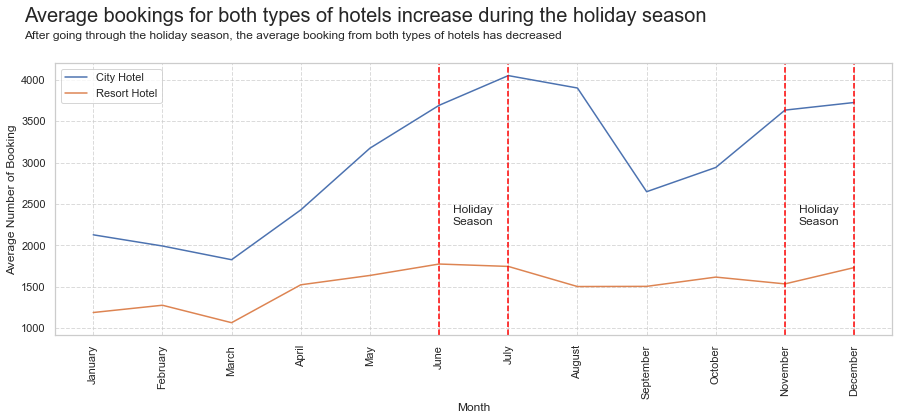

In [50]:
plt.figure(figsize=(15,5))
sns.lineplot(x=df_ch['arrival_month'],y=df_ch['avg_number_of_booking'],label='City Hotel')
sns.lineplot(x=df_rh['arrival_month'],y=df_rh['avg_number_of_booking'],label='Resort Hotel')
plt.text(x=-1,y=4700,s="Average bookings for both types of hotels increase during the holiday season",fontsize=20)
plt.text(x=-1,y=4500,s="After going through the holiday season, the average booking from both types of hotels has decreased",fontsize=12)
plt.xlabel('Month',fontsize=12)
plt.ylabel('Average Number of Booking',fontsize=12)
plt.xticks(rotation=90)
plt.axvline('June', color='red', linestyle='--')
plt.axvline('July', color='red', linestyle='--')
plt.axvline('November', color='red', linestyle='--')
plt.axvline('December', color='red', linestyle='--')
plt.text(x=5.2,y=2250,s='Holiday\nSeason',fontsize=12)
plt.text(x=10.2,y=2250,s='Holiday\nSeason',fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

## 5. Interpretation of plot results in the previous step (Hint:Pay attention to holidays in Indonesia)
Berdasarkan grafik di atas, pemesanan hotel rata-rata mengalami kenaikan pada musim liburan. Kenaikan tertinggi ada pada bulan juni - juli saat masa mudik lebaran dan libur sekolah. Pada akhir tahun (november - desember) rata-rata pemesanan hotel juga mengalami kenaikan tapi tidak sebesar bulan juni - juli.

# <B>Task 3:</b>

<AxesSubplot:xlabel='lead_time', ylabel='Count'>

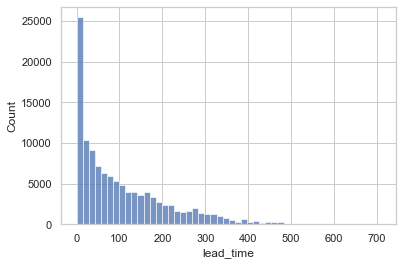

In [53]:
# Melakukan copy pada data hasil pre-processing
df3 = dfc.copy() 

sns.histplot(data=df2, x="lead_time", bins=50)

<B>1. Buatlah kolom baru yang berisi total durasi menginap. (Hint: Perhatikan kolom-kolom yang memuat informasi tentang durasi menginap)</B>

membuat kolom baru dari haris penjumlahan antara kolom `stays_in_weekend_nights` dengan `stays_in_weekdays_nights	`

In [41]:
#new columns duration of stay
df2['duration_of_stay'] = df2['stays_in_weekend_nights']+df2['stays_in_weekdays_nights']
df2.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,meal,city,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,guest,duration_of_stay
2,Resort Hotel,0,7,2017,September,27,1,0,1,Breakfast,Kabupaten Bangka,Direct,Direct,0,0,0,0,No Deposit,14.0,0,Personal,75.0,0,0,Check-Out,1.0,1
3,Resort Hotel,0,13,2017,September,27,1,0,1,Breakfast,Kabupaten Bangka,Corporate,Corporate,0,0,0,0,No Deposit,304.0,0,Personal,75.0,0,0,Check-Out,1.0,1
4,Resort Hotel,0,14,2017,September,27,1,0,2,Breakfast,Kabupaten Bangka,Online TA,TA/TO,0,0,0,0,No Deposit,240.0,0,Personal,98.0,0,1,Check-Out,2.0,2
5,Resort Hotel,0,14,2017,September,27,1,0,2,Breakfast,Kabupaten Bangka,Online TA,TA/TO,0,0,0,0,No Deposit,240.0,0,Personal,98.0,0,1,Check-Out,2.0,2
6,Resort Hotel,0,0,2017,September,27,1,0,2,Breakfast,Kota Denpasar,Direct,Direct,0,0,0,0,No Deposit,14.0,0,Personal,107.0,0,0,Check-Out,2.0,2


<B> 2. Kelompokkan nilai-nilai dari kolom baru pada langkah sebelumnya supaya lebih signifikan (Hint: Perhatikan persebaran datanya)</B>

In [54]:
# Mengkategorisasi kolom lead_time agar lebih sederhana
df3['lead_times'] = np.where(df3['lead_time'] > 400, 401, df3['lead_time']) # lead_time dengan value yg cukup besar (lebih dari 400) dikategorisasikan menjadi satu grup
bins = list(np.arange(0,max(df3['lead_times'])+30, 30))
labels = ["{0}-{1}".format(str(bins[x]), str(bins[x+1])) for x in range(len(bins[:-1]))]
df3['lead_time_group'] = pd.cut(df3['lead_times'],bins=bins, include_lowest=True, labels=labels) # groupping lead_time untuk setiap kelipatan 30

<b> 3. Buatlah tabel agregat yang menunjukan perbandingan jumlah pemesanan hotel yang dibatalkan terhadap durasi menginap untuk setiap jenis hotel (Hint: Perhatikan proporsi dari pemesanan yang dibatalkan) </b>

In [58]:
# melakukan agregasi data untuk menghitung jumlah pemesanan berdasarkan group lead_time yang sudah dibuat dan berdasarkan tipe hotel
df3_book = df3.groupby(['hotel','lead_time_group', 'is_canceled'])['hotel'].count().reset_index(name='num_bookings')
df3_pivot = df3_book.pivot_table(index=['hotel','lead_time_group'], columns='is_canceled', values='num_bookings').reset_index()
df3_pivot.columns = ['hotel_type','lead_time_group', 'not_canceled', 'canceled']
df3_pivot['all_bookings'] = df3_pivot['not_canceled']+df3_pivot['canceled']
df3_pivot['pct_canceled'] = df3_pivot['canceled']*100.0/(df3_pivot['all_bookings']) 

df3_pivot.head()

,hotel_type,lead_time_group,not_canceled,canceled,all_bookings,pct_canceled
0,City Hotel,0-30,17263,5096,22359,22.791717
1,City Hotel,30-60,7182,4588,11770,38.980459
2,City Hotel,60-90,5149,3678,8827,41.667611
3,City Hotel,90-120,3922,3483,7405,47.035787
4,City Hotel,120-150,3035,2530,5565,45.462713


<b> 4. Buatlah plot yang dapat menunjukan rasio pembatalan pesanan terhadap durasi menginap untuk setiap tipe hotel (Hint: Perhatikan jenis plot yang digunakan) </b>

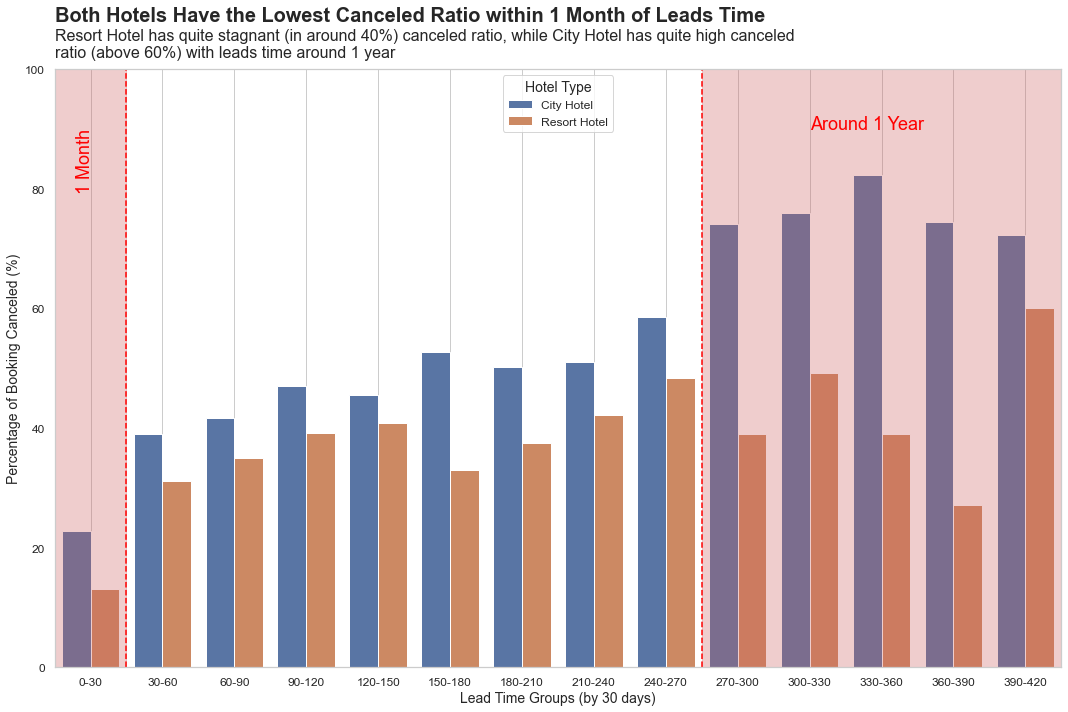

In [56]:
plt.figure(figsize=(15,10)) # mengatur ukuran figure
sns.barplot(x='lead_time_group', y='pct_canceled', hue='hotel_type', data=df3_pivot) # plot awal menggunakan barplot dari library seaborn

plt.tick_params(axis='both', which='major', labelsize=12) # memperbesar ukuran x-y axis label
plt.grid() # menambahkan gridline
plt.legend(title='Hotel Type', title_fontsize=14, prop={'size':12}, loc=9) # mengatur judul dan ukuran font pada legenda

plt.xlabel('Lead Time Groups (by 30 days)', fontsize=14) # mengatur title pada x-axis 
plt.ylabel('Percentage of Booking Canceled (%)', fontsize=14) # mengatur title pada y-axis 
plt.ylim(0, 100) # membatasi y-axis
plt.xlim(-0.5,13.5) # membatasi x-axis

plt.axvline(0.5, ls='--', color='red') # membuat garis vertikal untuk menghighlight insight
plt.text(x=-0.2, y=80, s='1 Month', fontsize=18, color='red', rotation=90) # menambahkan teks keterangan
plt.stackplot(np.arange(-0.5,1.5,1), [[100]], color='indianred', alpha=0.3) # memberikan blok warna pada area yang dihighlight 2 garis vertikal

plt.axvline(8.5, ls='--', color='red') # membuat garis vertikal untuk menghighlight insight
plt.text(x=10, y=90, s='Around 1 Year', fontsize=18, color='red') # menambahkan teks keterangan
plt.stackplot(np.arange(8.5,14.5,1), [[100]], color='indianred', alpha=0.3) # memberikan blok warna pada area yang dihighlight 2 garis vertikal

plt.text(x=-0.5, y=108, s="Both Hotels Have the Lowest Canceled Ratio within 1 Month of Leads Time", 
         fontsize=20, fontweight='bold') # memberikan judul yang informatif
plt.text(x=-0.5, y=102, s="Resort Hotel has quite stagnant (in around 40%) canceled ratio, while City Hotel has quite high canceled \nratio (above 60%) with leads time around 1 year", 
         fontsize=16) # memberikan keterangan tambahan atas judul
 
plt.tight_layout() # mengatur layout dari visualisasi agar tidak terpotong

<b>5. Tuliskan interpretasi terhadap hasil plot pada langkah sebelumnya (Hint: Perhatikan pengaruh dari durasi menginap terhadap tingkat pembatalan pemesanan hotel)</b>

Tujuan dari analisa ini adalah untuk mengamati  hubungan antara waktu antara pemesanan hotel dan tingkat pembatalan pemesanan hotel. Tingkat pembatalan paling rendah terjadi pada pemesanan dengan waktu antara pemesanan kurang dari 30 hari, dan pola ini berlaku untuk kedua jenis hotel. Hotel Resor menunjukkan tingkat pembatalan yang stabil sebesar 40%, sedangkan Hotel Perkotaan memiliki tingkat pembatalan yang relatif tinggi (60%) ketika waktu antara pemesanan mencapai sekitar 1 tahun.